## Poking around the Loki timestamps 

Playing with our new archival [Loki](https://loki.network) node.

Loki archival daemon countesy of [NeptuneResearch](https://github.com/neptuneresearch)

Analysis by [Isthmus](https://github.com/mitchellpkt)

Learn more at [Noncesense Research Lab](http://www.noncesense.org)

# Import 

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Presets

In [2]:
green = green = (0, .93, 0)
gray = (76/256,76/256,76/256)
plt.rcParams.update({'font.size': 15})

### Data

In [3]:
df = pd.read_csv('./data_for_analysis/loki_clean_csv.csv')
df.head()

,bool_is_main,node_receipt_timestamp,unk,major_version,minor_version,miner_reported_timestamp,nonce
0,1,1551680967534,0,10,10,1551680099,805374039
1,1,1551680967634,0,10,10,1551680127,709894
2,1,1551680967647,0,10,10,1551680220,3607114846
3,1,1551680967652,0,10,10,1551680226,1288495476
4,1,1551680967658,0,10,10,1551680233,402699573


# Analyze

## Nonces

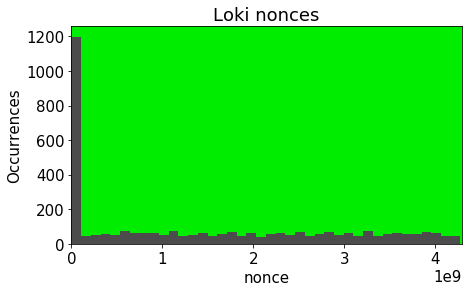

In [4]:
fig, ax = plt.subplots(figsize=(7,4))
n, bins, patches = ax.hist(df.nonce, color=gray, bins=40)  
ax.set_facecolor(green)
plt.xlabel('nonce')
plt.ylabel('Occurrences')
plt.title('Loki nonces')
plt.xlim((0,2**32-1));

## Timestamps

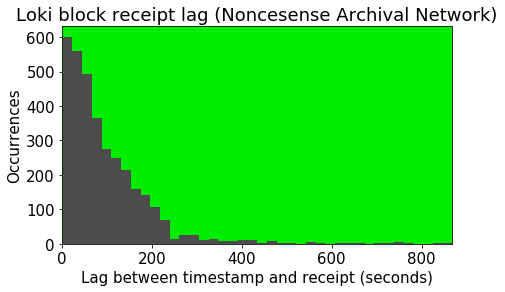

In [5]:
# Calculate lag
block_lag = df.node_receipt_timestamp/1000-df.miner_reported_timestamp

# Plot figure
fig, ax = plt.subplots(figsize=(7,4))
n, bins, patches = ax.hist(block_lag, color=gray, bins=40)  
ax.set_facecolor(green)
plt.xlabel('Lag between timestamp and receipt (seconds)')
plt.ylabel('Occurrences')
plt.xlim(0,max(block_lag))
plt.title('Loki block receipt lag (Noncesense Archival Network)');